# Upscale an image in Python for free

Lets compare variouse open-source, free Image Super-Resolution libraries in Python that upscale and improve the quality of low-resolution images.


## List of Python libraries for manipulating images.

1.) Pillow (PIL fork) - https://pillow.readthedocs.io/en/stable/handbook/concepts.html


### Pillow

We will start by using library called Pillow. Using Pillow we will Adjust Images to a Higher Resolution. For this we will try method called resize(). 

In [1]:
from PIL import Image

In [2]:
# set the base width of the result
basewidth = 5000
img = Image.open('IMG_3719.jpg')
# determining the height ratio
wpercent = (basewidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
# resize image and save
# If you are saving a .jpeg, use img.save('sompic.jpg', 'JPEG').
img = img.resize((basewidth,hsize), Image.ANTIALIAS)
img.save('IMG_3719_upscaled.jpg') 

This works, but not as expected. This reseizes images but does not upscale them. Useful if you want to convert image to a thumbnail or crop, but not if you want to enchance your image.  

In [3]:
import cv2
from cv2 import dnn_superres

In [11]:
import matplotlib.pyplot as plt

Installed wrong library. Grr. Now need to clean environment of some left overs for it to work correcty. 

you need to install - pip install opencv-contrib-python

DO NOT INSTALL - pip uninstall opencv-python

Or you will get the following error. 

![alt text](error.png "Title")

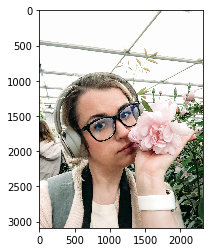

In [13]:
# Create an SR object - only function that differs from c++ code
sr = dnn_superres.DnnSuperResImpl_create()
# Read image
image = cv2.imread('IMG_3719.jpg')
plt.imshow(image[:,:,::-1])
plt.show()


In [5]:
# Read the desired model
path = "EDSR_x4.pb"
sr.readModel(path)
# Set the desired model and scale to get correct pre- and post-processing
sr.setModel("edsr", 4)
# Upscale the image
result = sr.upsample(image)
# Save the image
cv2.imwrite("./upscaled.png", result)

error: OpenCV(4.5.5) /Users/runner/work/opencv-python/opencv-python/opencv/modules/dnn/src/caffe/caffe_io.cpp:1138: error: (-2:Unspecified error) FAILED: fs.is_open(). Can't open "EDSR_x4.pb" in function 'ReadProtoFromBinaryFile'


In [14]:
sr = cv2.dnn_superres.DnnSuperResImpl_create()
path = "EDSR_x4.pb"
sr.readModel(path)
sr.setModel("edsr",4)
result = sr.upsample(img)
# Resized image
resized = cv2.resize(img,dsize=None,fx=4,fy=4)
plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
# Original image
plt.imshow(img[:,:,::-1])
plt.subplot(1,3,2)
# SR upscaled
plt.imshow(result[:,:,::-1])
plt.subplot(1,3,3)
# OpenCV upscaled
plt.imshow(resized[:,:,::-1])
plt.show()


error: OpenCV(4.5.5) /Users/runner/work/opencv-python/opencv-python/opencv/modules/dnn/src/caffe/caffe_io.cpp:1138: error: (-2:Unspecified error) FAILED: fs.is_open(). Can't open "EDSR_x4.pb" in function 'ReadProtoFromBinaryFile'
